# Week 6 - Bivariate Analysis, part 2

# 1. Lesson: no lesson this week

# 2. Weekly graph question

Suppose you wanted to show the nitrate and phosphate level in a water sample.  What are the advantages and disadvantages of showing this as an area plot, as opposed to two separate line graphs?  How would you adjust the graphs shown to improve the presentation?

In [3]:
import numpy as np
import seaborn as sns
import pandas as pd

Text(0, 0.5, 'Nitrate level (% of eutrophic value)')

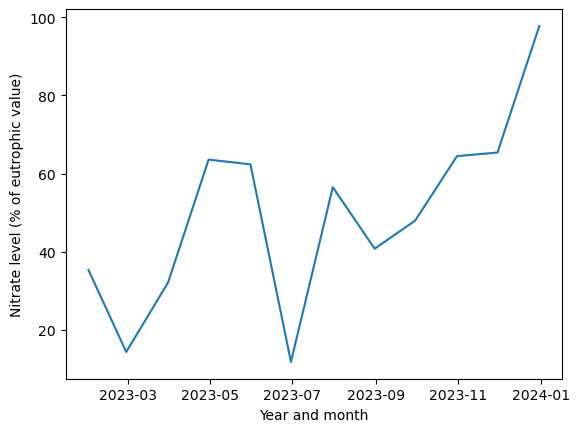

In [4]:
numdates = 12
np.random.seed(0)
time_series = 100 * (np.random.normal(size = numdates) / 5 + np.arange(numdates) / 16)
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='ME')
ax = sns.lineplot(x = datearray, y = time_series)
ax.set_xlabel("Year and month")
ax.set_ylabel("Nitrate level (% of eutrophic value)")

Text(0, 0.5, 'Phosphate level (% of eutrophic value)')

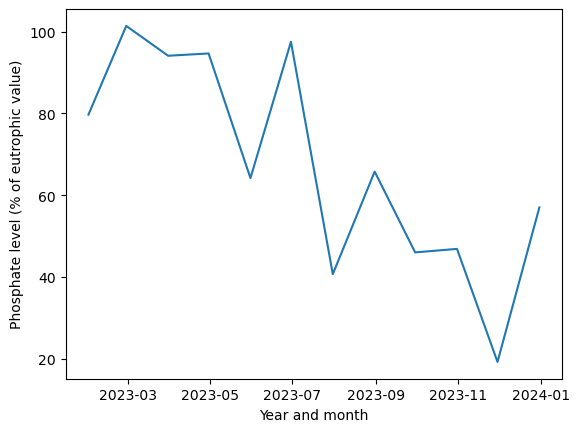

In [5]:
np.random.seed(1)
time_series_2 =  100 * (1 - (np.random.normal(size = numdates) / 8 + np.arange(numdates) / 16))
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='ME')
ax = sns.lineplot(x = datearray, y = time_series_2)
ax.set_xlabel("Year and month")
ax.set_ylabel("Phosphate level (% of eutrophic value)")

<Axes: >

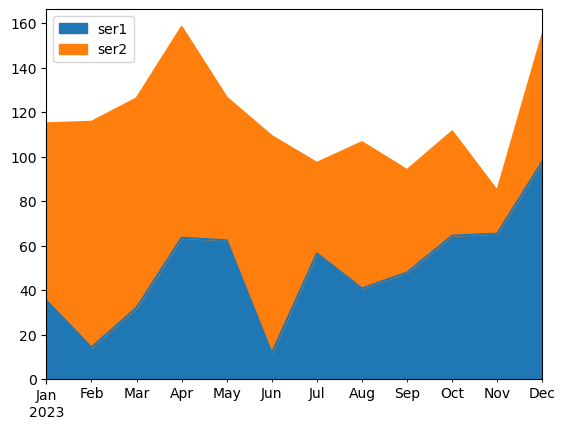

In [6]:
df = pd.DataFrame({'ser1': time_series, 'ser2': time_series_2}, index = datearray)
df.plot.area()

***What are the advantages and disadvantages of showing this as an area plot, as opposed to two separate line graphs?***

Advantages:

1. Visual Emphasis: The filled areas make it easier to see the volume and trends over time, giving a sense of magnitude and differences between the datasets.

2. Comparison: The overlapping areas allow for a clear comparison between the two datasets, highlighting where one outperforms the other.

3. Aesthetic Appeal: Area plots can be visually appealing and can help communicate the data story more effectively.

Disadvantages:
1. Potential for Overlap Confusion: If the areas overlap significantly, it can become difficult to distinguish between the two datasets, especially if the colors are not distinct enough.

2. Clutter: Adding more than two datasets can make the plot look cluttered and hard to interpret.

***How would you adjust the graphs shown to improve the presentation?***

To improve the presentation, you can consider the following adjustments:
- Add labels for each of the series to make it clear which area corresponds to which dataset.
- Add a label for the y-axis
- Center the x-axis labels to make it easier to read

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

### Here are some types of analysis you can do:

- Find correlations between pairs of variables.

- Draw scatterplots, especially when the correlation is large.

- Draw pairplots.

- Draw line graphs and/or area graphs when there is date or time data together with numerical data.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If the data are not useable, find some new data!

- Do you see any outliers?  (Data points that are far from the rest of the data).

- Are any data items highly correlated with each other, suggesting that they are redundant?

- For the line plots, do you see a trend or pattern over time?  Does this suggest that the data are changing over time (drifting) in such a way as to invalidate comparisons?

- Can you think of any confounding variables?  (Third variables that could explain any correlations between other variables.  These third variables may or may not be reported in the dataset.)

In [7]:
df_cyber= pd.read_parquet('UNSW_NB15_training-set.parquet')

In [8]:
df_cyber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 36 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   dur                175341 non-null  float32 
 1   proto              175341 non-null  category
 2   service            175341 non-null  category
 3   state              175341 non-null  category
 4   spkts              175341 non-null  int16   
 5   dpkts              175341 non-null  int16   
 6   sbytes             175341 non-null  int32   
 7   dbytes             175341 non-null  int32   
 8   rate               175341 non-null  float32 
 9   sload              175341 non-null  float32 
 10  dload              175341 non-null  float32 
 11  sloss              175341 non-null  int16   
 12  dloss              175341 non-null  int16   
 13  sinpkt             175341 non-null  float32 
 14  dinpkt             175341 non-null  float32 
 15  sjit               175341 non-null

In [9]:
df_cyber.describe()

,dur,spkts,dpkts,sbytes,dbytes,rate,sload,dload,sloss,dloss,...,dmean,trans_depth,response_body_len,ct_src_dport_ltm,ct_dst_sport_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,is_sm_ips_ports,label
count,175341.000000,175341.000000,175341.000000,1.753410e+05,1.753410e+05,175341.000000,1.753410e+05,1.753410e+05,175341.000000,175341.000000,...,175341.000000,175341.000000,1.753410e+05,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000
mean,1.359389,20.298664,18.969591,8.844844e+03,1.492892e+04,95406.179688,7.345403e+07,6.712055e+05,4.953000,6.948010,...,124.173382,0.105982,2.144292e+03,5.383538,4.206255,0.014948,0.014948,0.133066,0.015752,0.680622
std,6.483313,136.887597,110.258271,1.747656e+05,1.436542e+05,165417.671875,1.883701e+08,2.423637e+06,66.005059,52.732999,...,258.317056,0.776911,5.420797e+04,8.047104,5.783585,0.126048,0.126048,0.701208,0.124516,0.466237
min,0.000000,1.000000,0.000000,2.800000e+01,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,32.786140,1.305334e+04,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.001582,2.000000,2.000000,4.300000e+02,1.640000e+02,3225.806641,8.796748e+05,1.447023e+03,0.000000,0.000000,...,44.000000,0.000000,0.000000e+00,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.668069,12.000000,10.000000,1.418000e+03,1.102000e+03,125000.000000,8.888889e+07,2.784487e+04,3.000000,2.000000,...,89.000000,0.000000,0.000000e+00,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,59.999989,9616.000000,10974.000000,1.296523e+07,1.465555e+07,1000000.000000,5.988000e+09,2.242273e+07,4803.000000,5484.000000,...,1458.000000,172.000000,6.558056e+06,51.000000,46.000000,4.000000,4.000000,30.000000,1.000000,1.000000


 Here is a column that labels each record as either a "normal" instance or one of several attack types (e.g., DoS, Probe, etc.). You could use this column to color the points in your scatterplots, to see if the attack types are correlated with any of the other variables.

Class distribution (normal vs attack) in Training Data:
label
1    119341
0     56000
Name: count, dtype: int64


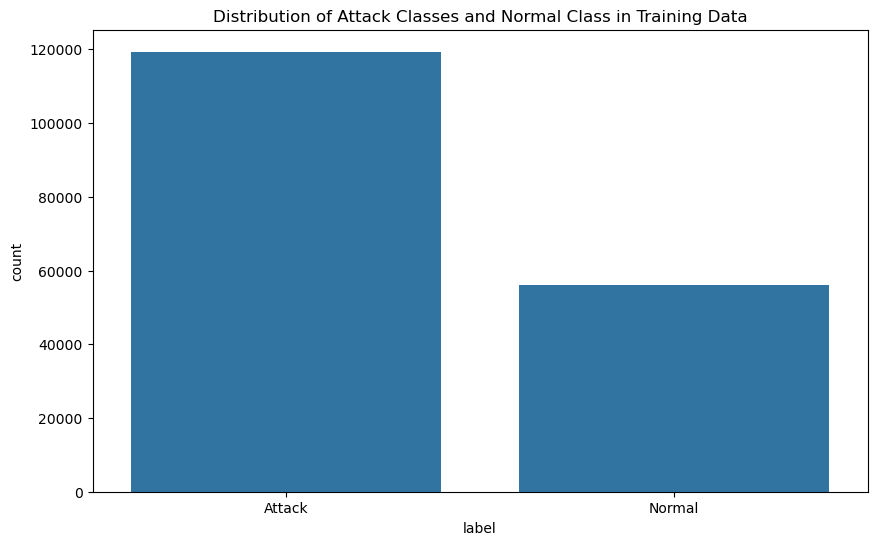

In [10]:
if 'label' in df_cyber.columns:
    print("Class distribution (normal vs attack) in Training Data:")
    print(df_cyber['label'].value_counts())

    # Plot the distribution of classes
    import matplotlib.pyplot as plt
    import seaborn as sns

    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_cyber, x='label', order=df_cyber['label'].value_counts().index)
    plt.xticks([0, 1], ['Attack', 'Normal'])
    plt.title('Distribution of Attack Classes and Normal Class in Training Data')
    plt.show()


Attack Type Distribution:
attack_cat
Normal            56000
Generic           40000
Exploits          33393
Fuzzers           18184
DoS               12264
Reconnaissance    10491
Analysis           2000
Backdoor           1746
Shellcode          1133
Worms               130
Name: count, dtype: int64


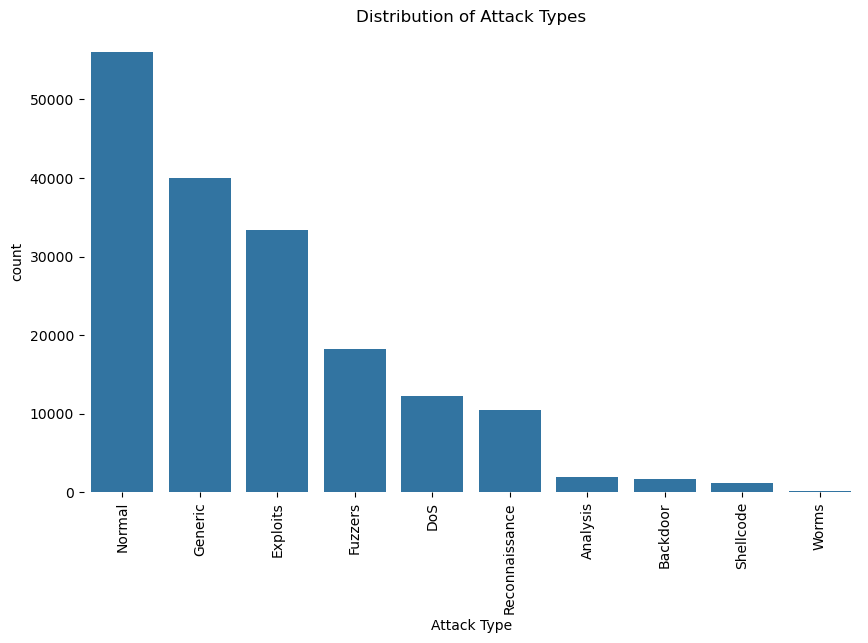

In [11]:
if 'attack_cat' in df_cyber.columns:
    print("\nAttack Type Distribution:")
    print(df_cyber['attack_cat'].value_counts())

    # Plot attack type distribution
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_cyber, x='attack_cat', order=df_cyber['attack_cat'].value_counts().index)
    plt.xticks(rotation=90)
    plt.xlabel('Attack Type')
    plt.title('Distribution of Attack Types')
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.show()


Service Distribution in Training Data:
service
-           94168
dns         47294
http        18724
smtp         5058
ftp-data     3995
ftp          3428
ssh          1302
pop3         1105
dhcp           94
snmp           80
ssl            56
irc            25
radius         12
Name: count, dtype: int64


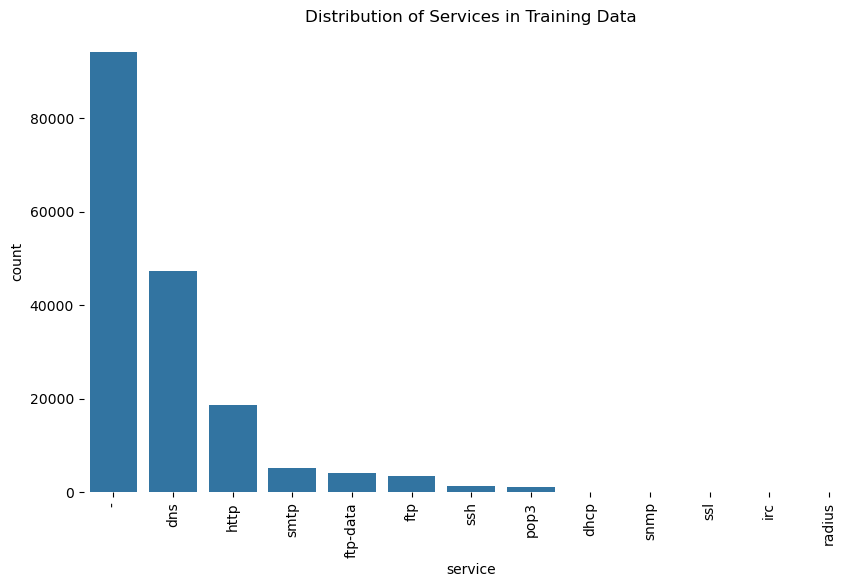

In [12]:
if 'service' in df_cyber.columns:
    print("\nService Distribution in Training Data:")
    print(df_cyber['service'].value_counts())

    # Plot service distribution
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_cyber, x='service', order=df_cyber['service'].value_counts().index)
    plt.xticks(rotation=90)
    plt.title('Distribution of Services in Training Data')
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.show()

In [13]:
def generate_features(df: pd.DataFrame) -> pd.DataFrame:
    """Generate new features from the given DataFrame and drop the original columns used to create those features.

    Args:
        df (pd.DataFrame): The input DataFrame containing original features.

    Returns:
        pd.DataFrame: The DataFrame with new features and without the original columns.
    """
    # Ratios
    df['byte_ratio'] = df['sbytes'] / (df['dbytes'] + 1)
    df['pkt_ratio'] = df['spkts'] / (df['dpkts'] + 1)
    df['load_ratio'] = df['sload'] / (df['dload'] + 1)
    df['jit_ratio'] = df['sjit'] / (df['djit'] + 1)
    df['inter_pkt_ratio'] = df['sinpkt'] / (df['dinpkt'] + 1)
    df['tcp_setup_ratio'] = df['tcprtt'] / (df['synack'] + df['ackdat'] + 1)

    # Aggregate Features
    df['total_bytes'] = df['sbytes'] + df['dbytes']
    df['total_pkts'] = df['spkts'] + df['dpkts']
    df['total_load'] = df['sload'] + df['dload']
    df['total_jitter'] = df['sjit'] + df['djit']
    df['total_inter_pkt'] = df['sinpkt'] + df['dinpkt']
    df['total_tcp_setup'] = df['tcprtt'] + df['synack'] + df['ackdat']

    # Interaction Features
    df['byte_pkt_interaction_src'] = df['sbytes'] * df['spkts']
    df['byte_pkt_interaction_dst'] = df['dbytes'] * df['dpkts']
    df['load_jit_interaction_src'] = df['sload'] * df['sjit']
    df['load_jit_interaction_dst'] = df['dload'] * df['djit']
    df['pkt_jit_interaction_src'] = df['spkts'] * df['sjit']
    df['pkt_jit_interaction_dst'] = df['dpkts'] * df['djit']

    # Statistical Features
    df['mean_pkt_size'] = df['smean'] + df['dmean']
    df['tcp_seq_diff'] = df['stcpb'] - df['dtcpb']

    # Dropping original columns used for generating new features
    columns_to_drop = [
        'sbytes', 'dbytes', 'spkts', 'dpkts', 'sload', 'dload',
        'sjit', 'djit', 'sinpkt', 'dinpkt', 'tcprtt', 'synack',
        'ackdat', 'smean', 'dmean', 'stcpb', 'dtcpb'
    ]
    
    df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

    return df

In [14]:
generate_features(df_cyber)

,dur,proto,service,state,rate,sloss,dloss,swin,dwin,trans_depth,...,total_inter_pkt,total_tcp_setup,byte_pkt_interaction_src,byte_pkt_interaction_dst,load_jit_interaction_src,load_jit_interaction_dst,pkt_jit_interaction_src,pkt_jit_interaction_dst,mean_pkt_size,tcp_seq_diff
0,0.121478,tcp,-,FIN,74.087486,0,0,255,255,0,...,32.670601,0.000000,1548,688,4.272822e+05,1.005053e+05,181.065277,47.322414,86,-1580760939
1,0.649902,tcp,-,FIN,78.473373,2,17,255,255,0,...,65.347870,0.000000,10276,1596532,5.156860e+05,6.988454e+08,859.977051,52735.578125,1158,-1659503825
2,1.623129,tcp,-,FIN,14.170161,1,6,255,255,0,...,334.612762,0.223794,2912,210976,2.701098e+07,6.958682e+08,137436.687500,182734.812500,870,-846964266
3,1.681642,tcp,ftp,FIN,13.677108,1,3,255,255,0,...,243.112274,0.000000,7536,9240,7.099260e+05,1.676552e+07,3108.961914,59901.414062,116,59676287
4,0.449454,tcp,-,FIN,33.373825,2,1,255,255,0,...,123.409927,0.256762,5340,1608,2.068319e+07,4.617294e+05,24158.376953,694.841980,98,458983359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,0.000009,udp,dns,INT,111111.109375,0,0,0,0,0,...,0.009000,0.000000,228,0,0.000000e+00,0.000000e+00,0.000000,0.000000,57,0
175337,0.505762,tcp,-,FIN,33.612648,2,1,255,255,0,...,121.380676,0.198880,6200,2832,3.284322e+07,5.892906e+05,37210.687500,961.421814,106,65683830
175338,0.000009,udp,dns,INT,111111.109375,0,0,0,0,0,...,0.009000,0.000000,228,0,0.000000e+00,0.000000e+00,0.000000,0.000000,57,0
175339,0.000009,udp,dns,INT,111111.109375,0,0,0,0,0,...,0.009000,0.000000,228,0,0.000000e+00,0.000000e+00,0.000000,0.000000,57,0


In [15]:
df_cyber_clean = df_cyber.copy()


In [16]:
numeric_columns = df_cyber.select_dtypes(include=[np.number]).columns
numeric_data = df_cyber[numeric_columns]

corr_matrix = numeric_data.corr()

corr_matrix.round(4)

,dur,rate,sloss,dloss,swin,dwin,trans_depth,response_body_len,ct_src_dport_ltm,ct_dst_sport_ltm,...,total_inter_pkt,total_tcp_setup,byte_pkt_interaction_src,byte_pkt_interaction_dst,load_jit_interaction_src,load_jit_interaction_dst,pkt_jit_interaction_src,pkt_jit_interaction_dst,mean_pkt_size,tcp_seq_diff
dur,1.0000,-0.1210,0.1986,0.1430,0.0220,0.0175,0.0021,0.0789,-0.0941,-0.0939,...,0.0986,0.0531,0.0304,0.0733,-0.0026,0.0675,0.3012,0.1764,0.0793,-0.0018
rate,-0.1210,1.0000,-0.0429,-0.0753,-0.5157,-0.5181,-0.0786,-0.0228,0.3536,0.3907,...,-0.0810,-0.3008,-0.0147,-0.0467,0.0082,-0.1130,-0.0784,-0.0542,-0.2979,-0.0001
sloss,0.1986,-0.0429,1.0000,0.0180,0.0820,0.0823,0.0036,-0.0018,-0.0392,-0.0411,...,-0.0094,0.0514,0.0706,0.0269,-0.0008,0.0230,0.2527,0.0223,0.1630,0.0064
dloss,0.1430,-0.0753,0.0180,1.0000,0.1439,0.1454,0.0285,0.4621,-0.0664,-0.0722,...,-0.0179,0.0102,0.0216,0.4719,-0.0017,0.5004,0.1540,0.5753,0.3323,0.0007
swin,0.0220,-0.5157,0.0820,0.1439,1.0000,0.9901,0.1490,0.0432,-0.4531,-0.4980,...,-0.0964,0.5698,0.0250,0.0887,-0.0113,0.2159,0.1464,0.1026,0.5008,0.0004
dwin,0.0175,-0.5181,0.0823,0.1454,0.9901,1.0000,0.1505,0.0436,-0.4486,-0.4936,...,-0.0964,0.5754,0.0253,0.0895,-0.0112,0.2181,0.1477,0.1036,0.5080,0.0002
trans_depth,0.0021,-0.0786,0.0036,0.0285,0.1490,0.1505,1.0000,0.0455,-0.0700,-0.0739,...,-0.0156,0.1003,0.0009,0.0283,-0.0017,0.0443,0.0116,0.0193,0.1127,0.0051
response_body_len,0.0789,-0.0228,-0.0018,0.4621,0.0432,0.0436,0.0455,1.0000,-0.0206,-0.0217,...,-0.0054,0.0123,0.0070,0.2566,-0.0005,0.1057,0.0425,0.2020,0.1420,-0.0100
ct_src_dport_ltm,-0.0941,0.3536,-0.0392,-0.0664,-0.4531,-0.4486,-0.0700,-0.0206,1.0000,0.9068,...,-0.0647,-0.2648,-0.0137,-0.0402,-0.0053,-0.0986,-0.0587,-0.0466,-0.3105,-0.0002
ct_dst_sport_ltm,-0.0939,0.3907,-0.0411,-0.0722,-0.4980,-0.4936,-0.0739,-0.0217,0.9068,1.0000,...,-0.0617,-0.2809,-0.0141,-0.0447,-0.0051,-0.1088,-0.0610,-0.0510,-0.3461,-0.0005


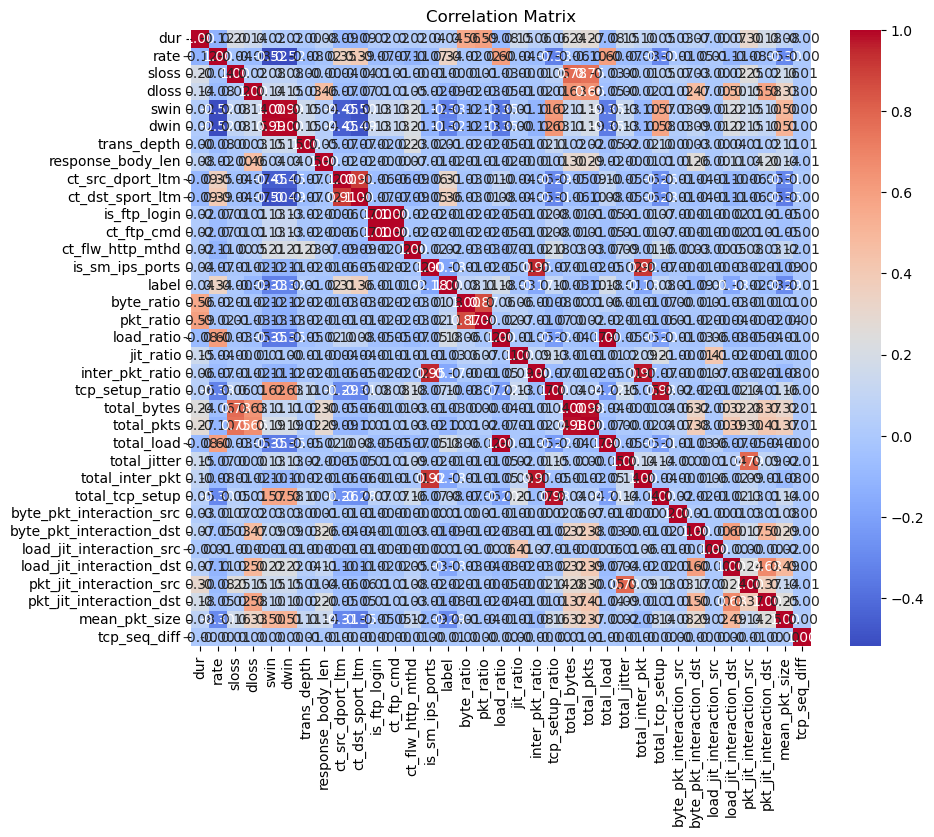

In [17]:
#create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [27]:
from IPython.display import display


threshold = 0.75
high_corr_pairs = []

# Loop through the correlation matrix to find highly correlated pairs
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

# Convert to DataFrame for better visualization
high_corr_df = pd.DataFrame(high_corr_pairs, columns=['Feature 1', 'Feature 2', 'Correlation'])
print("Highly Correlated Features:")
display(high_corr_df)



Highly Correlated Features:


,Feature 1,Feature 2,Correlation
0,dwin,swin,0.990140
1,ct_dst_sport_ltm,ct_src_dport_ltm,0.906793
2,ct_ftp_cmd,is_ftp_login,1.000000
3,pkt_ratio,byte_ratio,0.869379
4,inter_pkt_ratio,is_sm_ips_ports,0.947364
5,total_bytes,sloss,0.776766
6,total_pkts,sloss,0.752868
7,total_pkts,total_bytes,0.982697
8,total_load,load_ratio,0.999885
9,total_inter_pkt,is_sm_ips_ports,0.919461


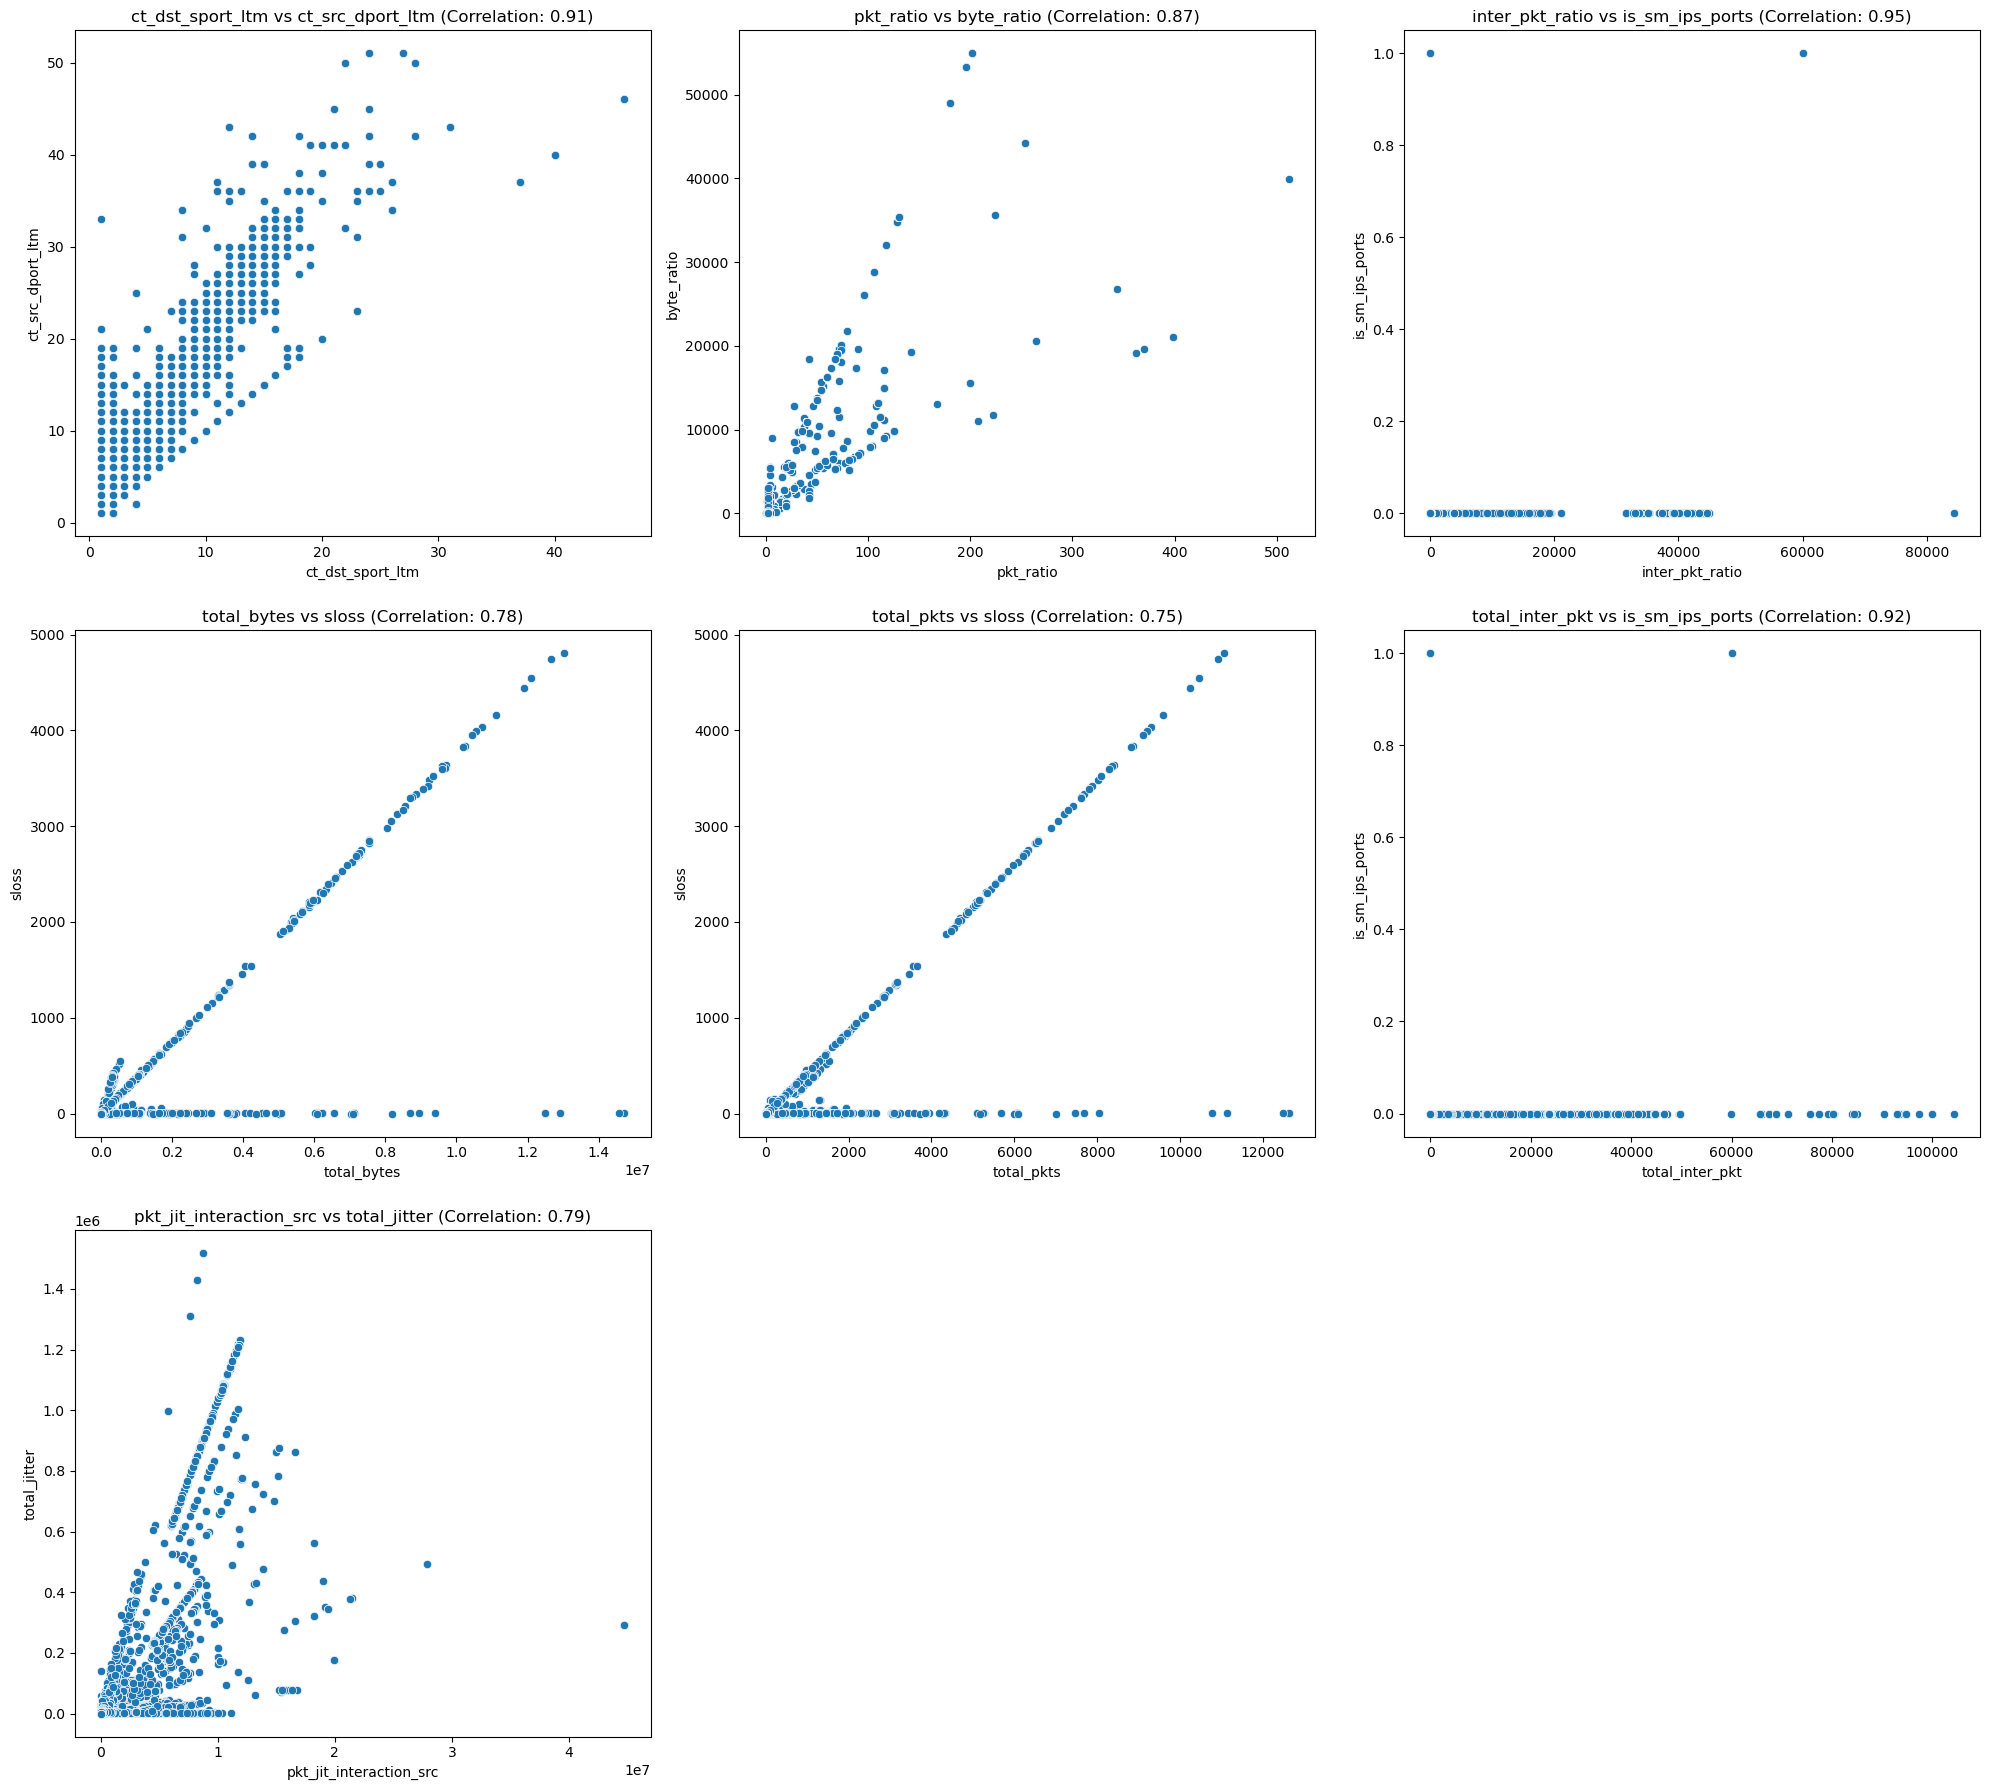

In [19]:
# Loop through the highly correlated pairs and create scatter plots
# Filter out pairs with correlations higher than 96.5
filtered_pairs = [pair for pair in high_corr_pairs if abs(pair[2]) <= 0.965]

# Create a grid of charts with three columns
num_plots = len(filtered_pairs)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 6))
axes = axes.flatten()

for i, (feature1, feature2, corr) in enumerate(filtered_pairs):
    sns.scatterplot(data=df_cyber, x=feature1, y=feature2, ax=axes[i])
    axes[i].set_title(f'{feature1} vs {feature2} (Correlation: {corr:.2f})')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



In [20]:
categorical_features = df_cyber.select_dtypes(exclude=['number']).columns.tolist()
numeric_features     = df_cyber.select_dtypes(include=['number']).columns.tolist()


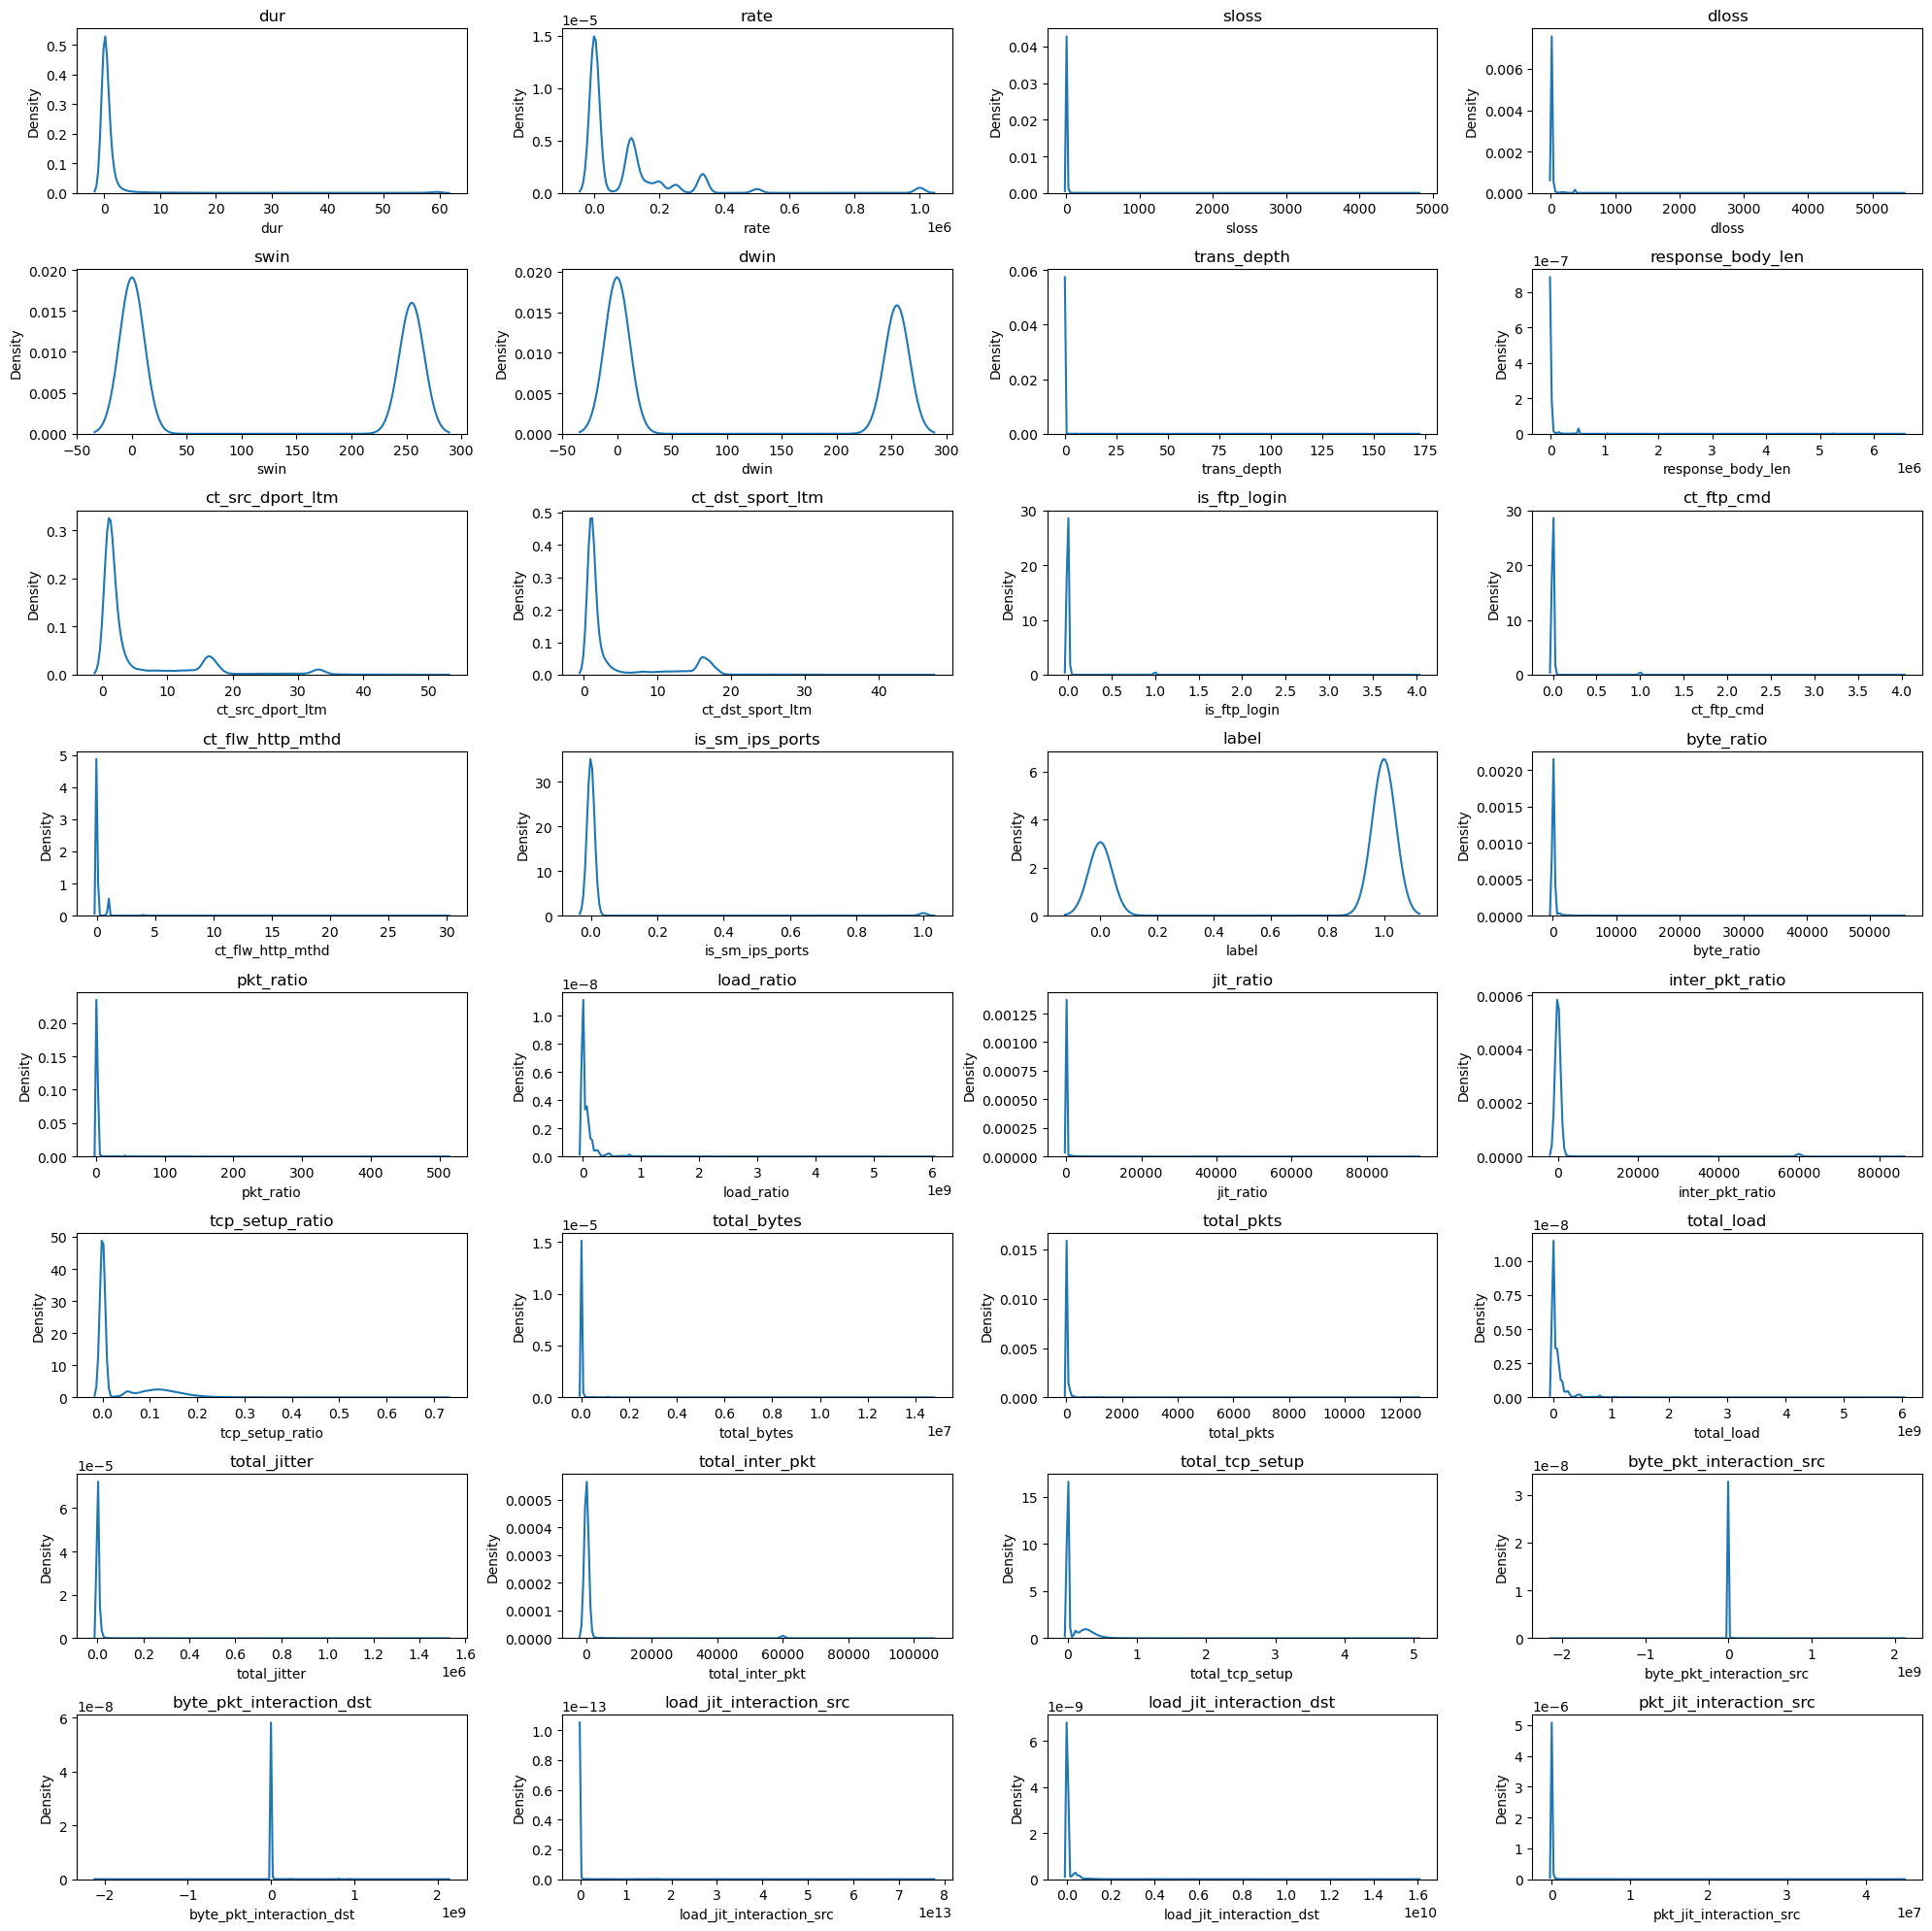

In [21]:
fig, axes = plt.subplots(nrows=len(df_cyber[numeric_features].columns)//4, ncols=4, figsize=(20, 20))
axes = axes.flatten()

for i, feature in enumerate(df_cyber[numeric_features].columns):
    if i < len(axes):
        sns.kdeplot(data=df_cyber[numeric_features], x=feature, ax=axes[i])
        axes[i].set_title(feature)

plt.tight_layout()
plt.show()

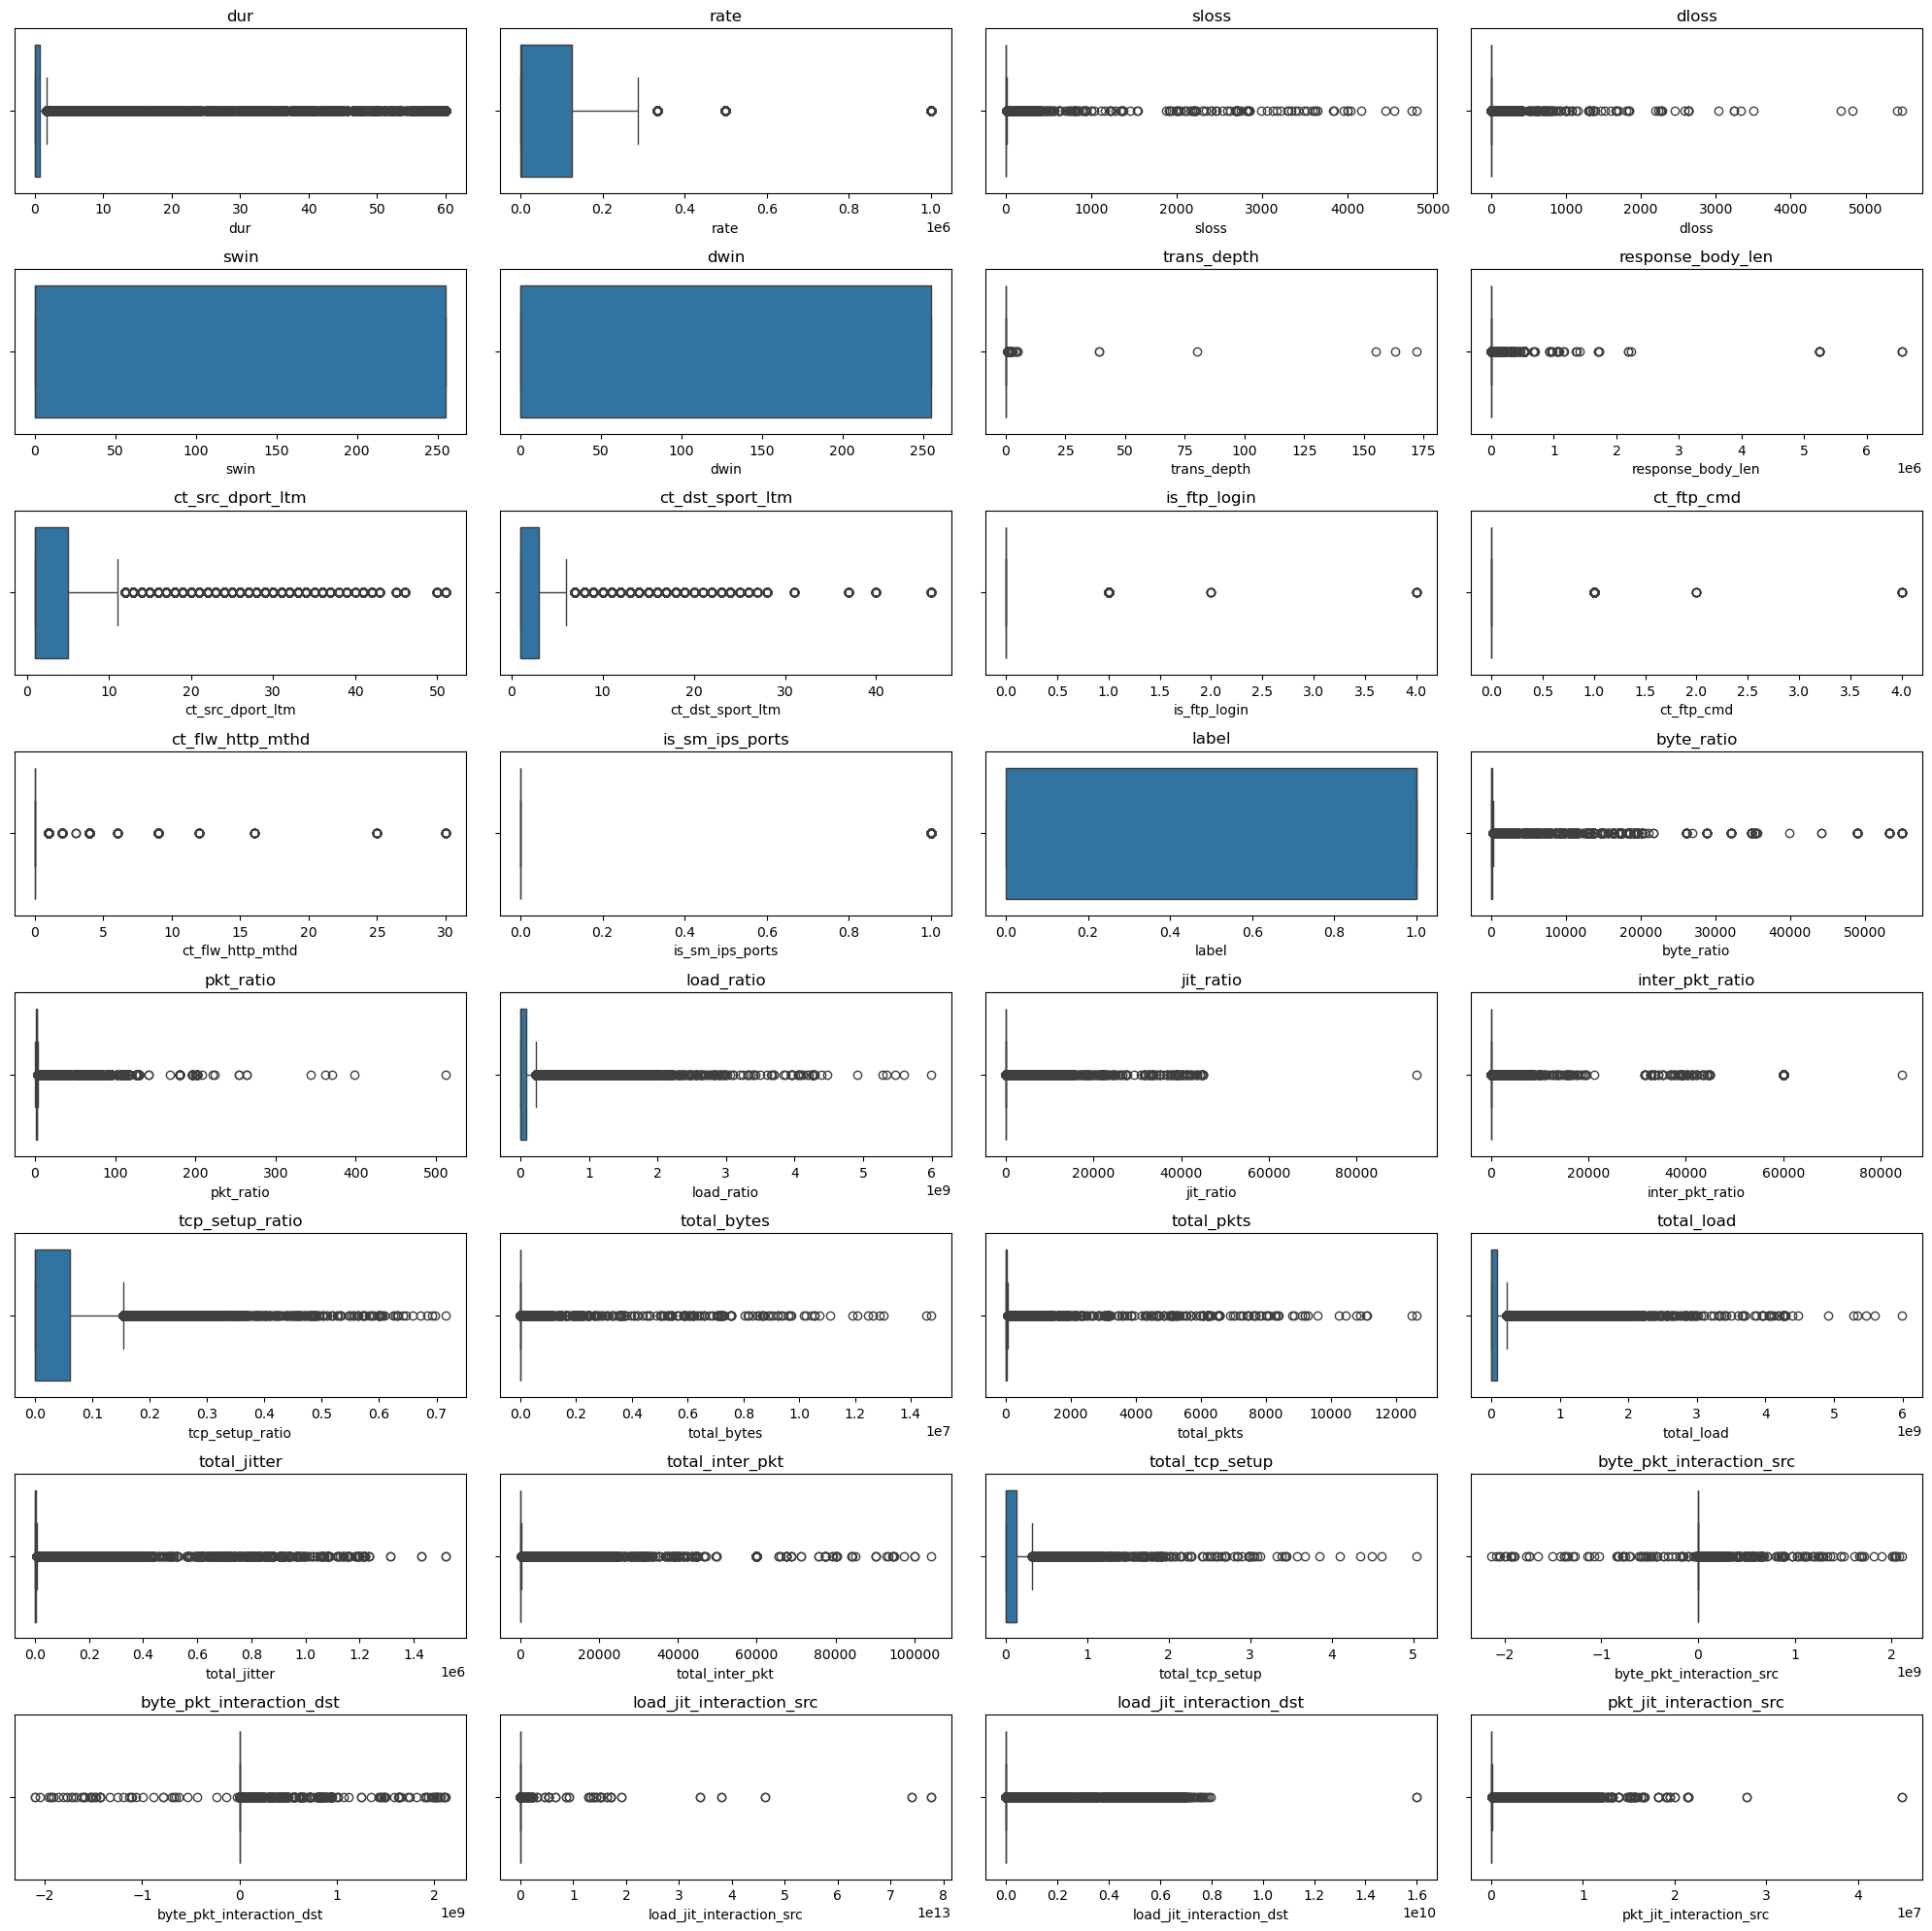

In [22]:

fig, axes = plt.subplots(nrows=len(df_cyber[numeric_features].columns)//4, ncols=4, figsize=(20, 20))
axes = axes.flatten()

for i, feature in enumerate(df_cyber[numeric_features].columns):
    if i < len(axes):
        sns.boxplot(data=df_cyber, x=feature, ax=axes[i])
        axes[i].set_title(feature)

plt.tight_layout()
plt.show()



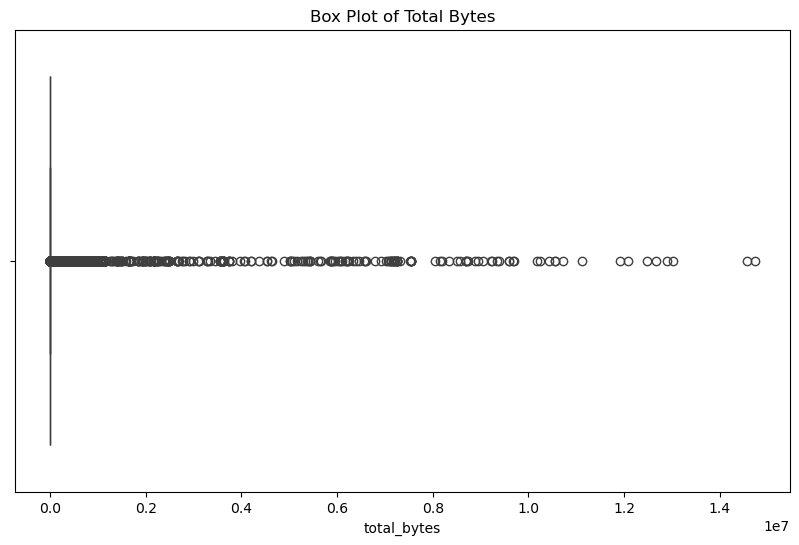

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cyber, x='total_bytes')
plt.title('Box Plot of Total Bytes')
plt.show()


The distribution indicates a high concentration of data points with a few extreme outliers. Understanding these outliers can provide insights into the scenarios where the byte transfer size deviates from the norm.

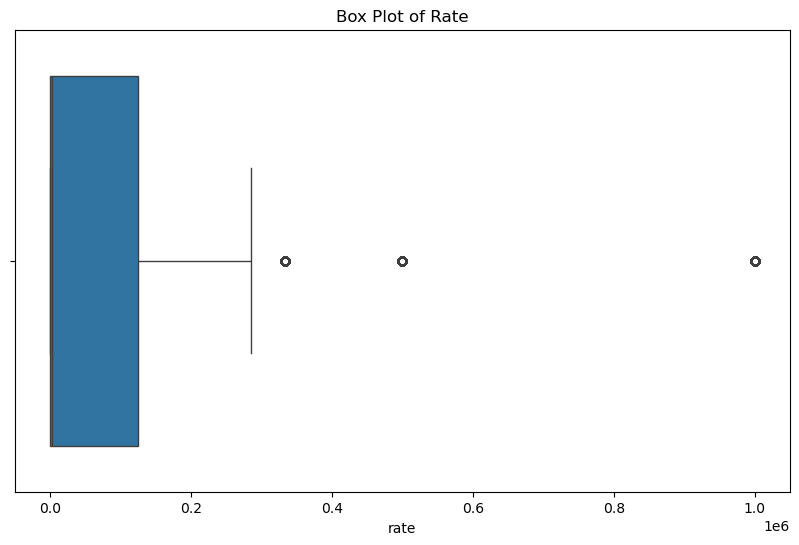

In [24]:
#create a boxplot for 'rate'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cyber, x='rate')
plt.title('Box Plot of Rate')
plt.show()


The distribution shows a considerable range with a few outliers. This could indicate packet reordering events, which might be noteworthy depending on the context of the data.

With this dataset there are some areas that can be cleaned up and improved.  For example, the column names are not very descriptive. Column names could be changed to be more descriptive. Columns that are not useful for the analysis can be removed. Also rows with missing or duplicate data can be removed as well.

In this initial analysis, there are some outliers in the data. Further analysis is needed to determine if these outliers are valid data points or if they should be removed. There are some columns that are highly correlated with each other. These columns could be removed to reduce redundancy in the data. 

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 86-98 of the Storytelling With Data book as best you can.  (The second half of chapter three).  You do not have to get the exact data values right, just the overall look and feel.

pg 88

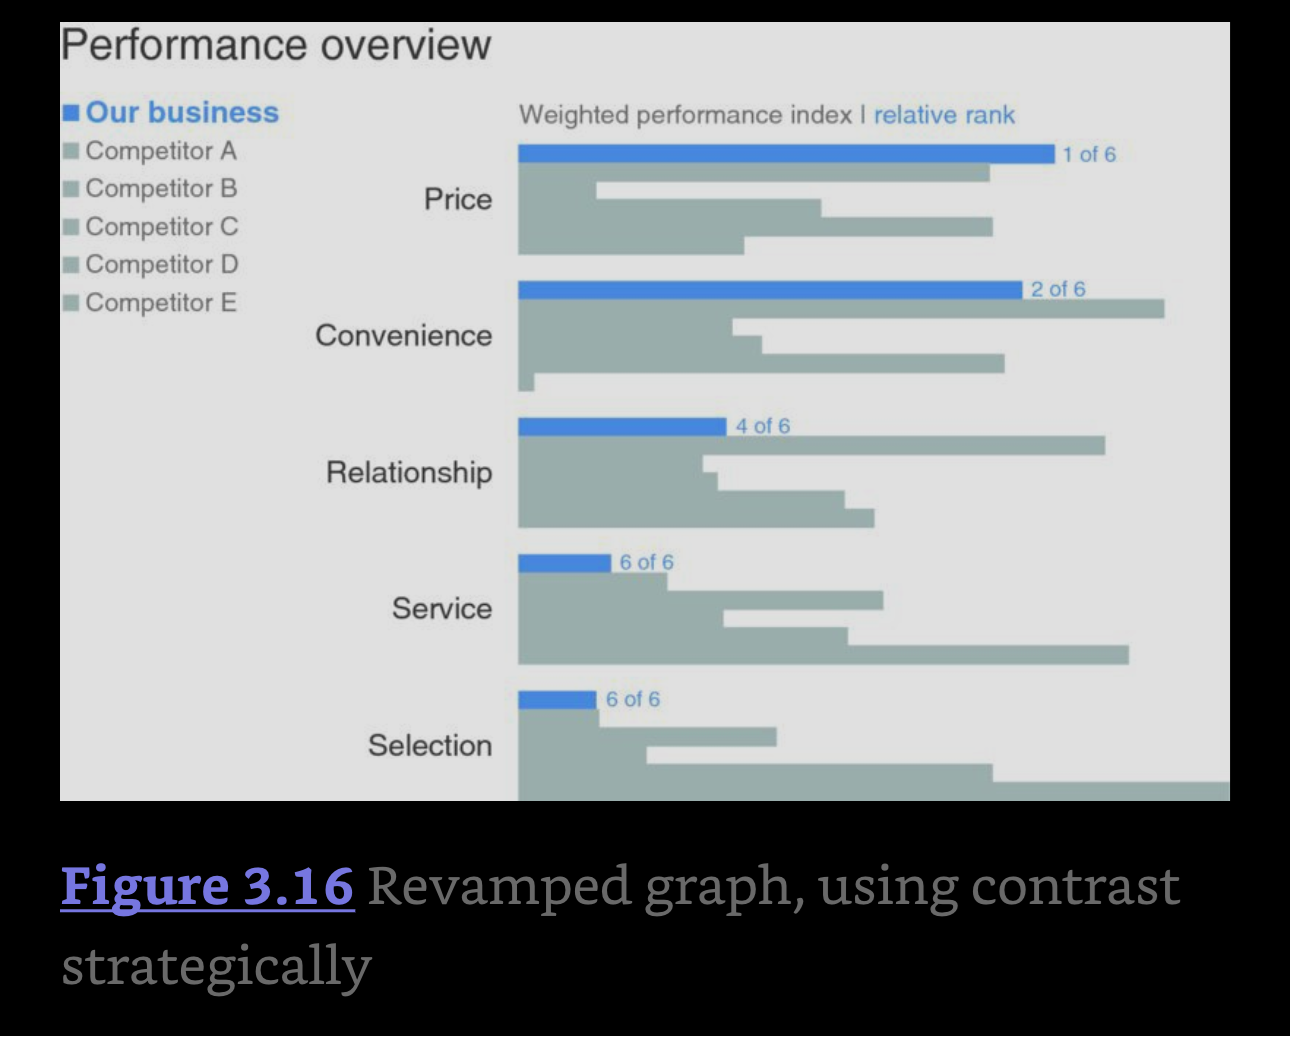

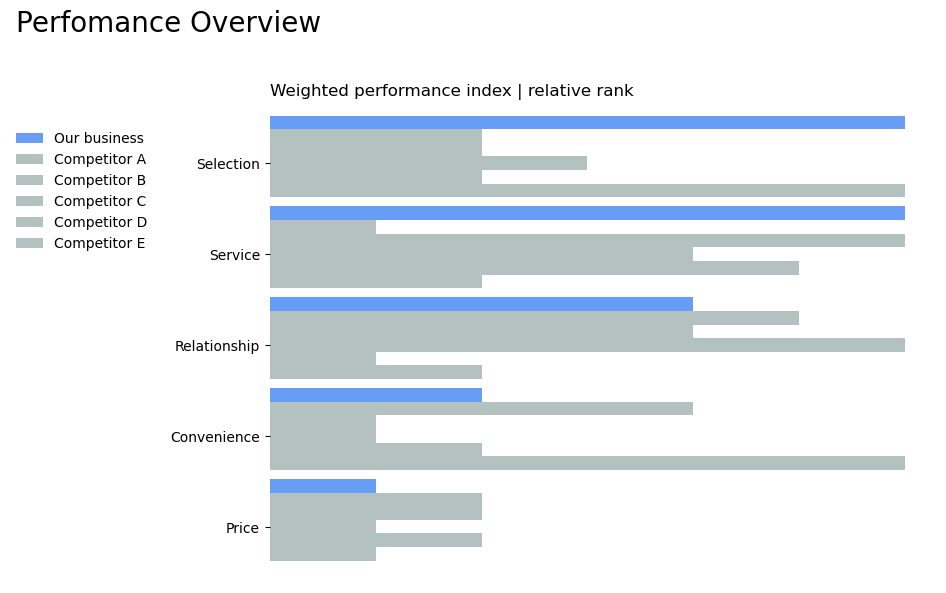

In [25]:
categories = ['Price', 'Convenience', 'Relationship', 'Service', 'Selection']
n_categories = len(categories)

our_business = [1, 2, 4, 6, 6]
competitors = {
    'Competitor A': np.random.randint(1, 7, n_categories),
    'Competitor B': np.random.randint(1, 7, n_categories),
    'Competitor C': np.random.randint(1, 7, n_categories),
    'Competitor D': np.random.randint(1, 7, n_categories),
    'Competitor E': np.random.randint(1, 7, n_categories)
}

# Chart settings
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.15
opacity = 0.8
index = np.arange(n_categories)

# Plot bars for our business
plt.barh(index + len(competitors) * bar_width, our_business, bar_width, alpha=opacity, color='#4285F4', label='Our business')

# Plot bars for our business and competitors
for i, (comp, scores) in enumerate(competitors.items()):
    plt.barh(index + i * bar_width, scores, bar_width, alpha=opacity, color='#A0B2B2', label=comp)

# Labels and title
#plt.title('Performance Overview', loc='left')
plt.yticks(index + bar_width * (len(competitors) // 2), categories)
legend = plt.legend(loc='center left', bbox_to_anchor=(-0.4, .80))  
legend.get_frame().set_linewidth(0)  
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticks([])  

plt.text(-2.4, n_categories + 0.75, 'Perfomance Overview', fontsize=20, ha='left')
plt.text(0, n_categories + 0.05, 'Weighted performance index | relative rank', fontsize=12, ha='left')

plt.tight_layout()
plt.show()

This is pretty close to the revamped chart from the book. I wasn't able to change the color for 'relative rank' text. Nor was I able to add labels to the 'Our Business' series in the chart.  I like the use of color contrast in this chart to make the 'Our Business' data stand out. 